In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import networkx as nx
import tqdm
import pickle


In [ ]:
from matplotlib.lines import Line2D


In [5]:
import glob


In [83]:
def get_files(directory, filename_prefix = 'sensors_df'):
    df = pd.concat([
    pd.concat([pd.read_csv(i) for i in glob.glob(f'{directory}_rewired_data_{ii}/**/{filename_prefix}_rew*')], keys = range(len(glob.glob(f'{directory}_rewired_data_{ii}/**/{filename_prefix}_rew*')))).reset_index()
    for ii in range(1,11)], keys = range(10)).drop(columns='level_1').rename(columns={'level_0':'inner_itr'}).reset_index().rename(columns={'level_0':'outer_itr'})
    df['random_id'] = df['outer_itr'].astype(str)+ df['inner_itr'].astype(str)
    
    return df

# Sensors

In [93]:
pombe_random_sensors = get_files('../data/interim/pombe/pombe')
human_random_sensors = get_files('../data/interim/coessentiality/coessentiality')

In [94]:
pombe_sensors = pd.read_csv('../data/interim/pombe/pombe_sensors_df_corr.csv')
human_sensors = pd.read_csv('../data/interim/coessentiality/coessentiality_sensors_df_human.csv')

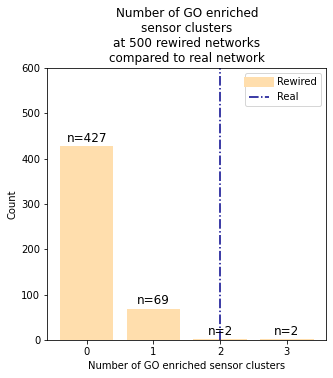

In [122]:
fig, ax =plt.subplots(figsize=(5,5))
#plt.bar(labels, counts, align='center')
labels, counts = np.unique(pombe_random_sensors.groupby('random_id')['go_group'].nunique(), return_counts=True)
ax.bar(labels,counts, align='center',color='navajowhite')
#ax.hist(,,color='navajowhite')
ax.set_xlabel('Number of GO enriched sensor clusters')
ax.set_ylabel('Count')
ax.set_title(f'Number of GO enriched\nsensor clusters\nat {len(res)} rewired networks\ncompared to real network')
ax.axvline(pombe_sensors['go_group'].nunique(),c='darkblue',linestyle='-.')
#ax.set_xlim(,)
ax.set_xticks([0,1,2,3])
plt.legend(handles = [
    Line2D([0],[0],color='navajowhite',linewidth=10,label='Rewired'),
    Line2D([0],[0],color='darkblue',linestyle='-.', label='Real')
], loc='upper right')

# Iterrating over the bars one-by-one
for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"n={format(bar.get_height(), '.0f')}",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylim(0,600)
#if snakemake.params['save']:
fig.savefig(f'../reports/figures/paper_figures_pombe/rewired_go_sensor_count.png', bbox_inches='tight',dpi=150)




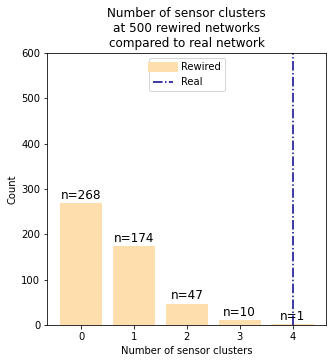

In [123]:
fig, ax =plt.subplots(figsize=(5,5))
#plt.bar(labels, counts, align='center')
labels, counts = np.unique(pombe_random_sensors.groupby('random_id')['sensor_cluster'].nunique(), return_counts=True)
ax.bar(labels,counts, align='center',color='navajowhite')
#ax.hist(,,color='navajowhite')
ax.set_xlabel('Number of sensor clusters')
ax.set_ylabel('Count')
ax.set_title(f'Number of sensor clusters\nat {len(res)} rewired networks\ncompared to real network')
ax.axvline(pombe_sensors['sensor_cluster'].nunique(),c='darkblue',linestyle='-.')
#ax.set_xlim(,)
ax.set_xticks([0,1,2,3,4])
plt.legend(handles = [
    Line2D([0],[0],color='navajowhite',linewidth=10,label='Rewired'),
    Line2D([0],[0],color='darkblue',linestyle='-.', label='Real')
], loc='upper center')

# Iterrating over the bars one-by-one
for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"n={format(bar.get_height(), '.0f')}",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylim(0,600)
#if snakemake.params['save']:
fig.savefig(f'../reports/figures/paper_figures_pombe/rewired_sensor_count.png', bbox_inches='tight',dpi=150)


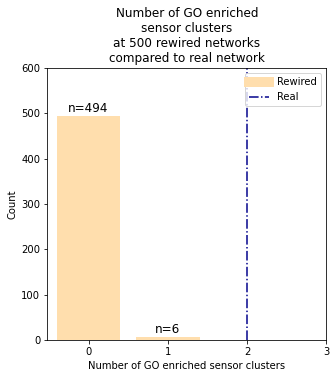

In [124]:
fig, ax =plt.subplots(figsize=(5,5))
#plt.bar(labels, counts, align='center')
labels, counts = np.unique(human_random_sensors.groupby('random_id')['go_group'].nunique(), return_counts=True)
ax.bar(labels,counts, align='center',color='navajowhite')
#ax.hist(,,color='navajowhite')
ax.set_xlabel('Number of GO enriched sensor clusters')
ax.set_ylabel('Count')
ax.set_title(f'Number of GO enriched\nsensor clusters\nat {len(res)} rewired networks\ncompared to real network')
ax.axvline(human_sensors['go_group'].nunique(),c='darkblue',linestyle='-.')
#ax.set_xlim(,)
ax.set_xticks([0,1,2,3])
plt.legend(handles = [
    Line2D([0],[0],color='navajowhite',linewidth=10,label='Rewired'),
    Line2D([0],[0],color='darkblue',linestyle='-.', label='Real')
], loc='upper right')

# Iterrating over the bars one-by-one
for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"n={format(bar.get_height(), '.0f')}",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylim(0,600)
#if snakemake.params['save']:
fig.savefig(f'../reports/figures/paper_figures_coessentiality/rewired_go_sensor_count.png', bbox_inches='tight',dpi=150)




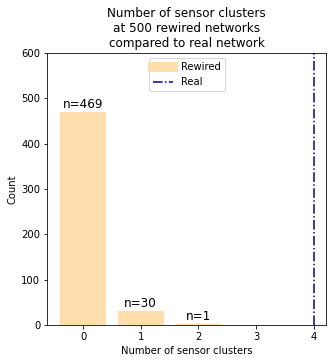

In [125]:
fig, ax =plt.subplots(figsize=(5,5))
#plt.bar(labels, counts, align='center')
labels, counts = np.unique(human_random_sensors.groupby('random_id')['sensor_cluster'].nunique(), return_counts=True)
ax.bar(labels,counts, align='center',color='navajowhite')
#ax.hist(,,color='navajowhite')
ax.set_xlabel('Number of sensor clusters')
ax.set_ylabel('Count')
ax.set_title(f'Number of sensor clusters\nat {len(res)} rewired networks\ncompared to real network')
ax.axvline(human_sensors['sensor_cluster'].nunique(),c='darkblue',linestyle='-.')
#ax.set_xlim(,)
ax.set_xticks([0,1,2,3,4])
plt.legend(handles = [
    Line2D([0],[0],color='navajowhite',linewidth=10,label='Rewired'),
    Line2D([0],[0],color='darkblue',linestyle='-.', label='Real')
], loc='upper center')

# Iterrating over the bars one-by-one
for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"n={format(bar.get_height(), '.0f')}",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
ax.set_ylim(0,600)
#if snakemake.params['save']:
fig.savefig(f'../reports/figures/paper_figures_coessentiality/rewired_sensor_count.png', bbox_inches='tight',dpi=150)



In [85]:
pombe_pcc = get_files('../data/interim/pombe/pombe', 'df')

In [87]:
pombe_pcc.to_csv('../data/interim/pombe/pombe_df_random_500_corr.csv')

In [88]:
human_pcc = get_files('../data/interim/coessentiality/coessentiality', 'df')

In [91]:
human_pcc.to_csv('../data/interim/coessentiality/coessentiality_df_random_500_human.csv')